# 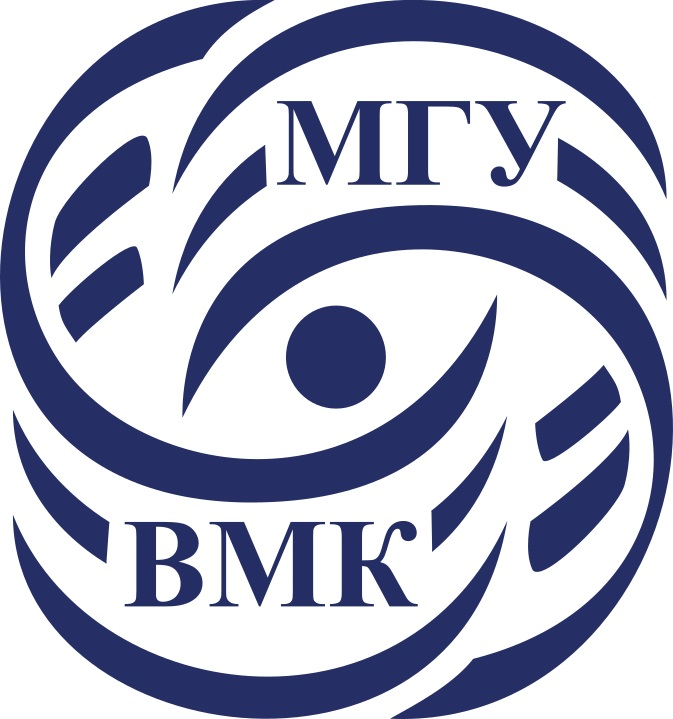

# Машинное обучение. ВМК МГУ

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Практическое задание 10: Градиентный бустинг деревьев - часть 1

## Уровень: <font color='SkyBlue'>**Базовый (Base)**</font>

# О формате сдачи

🔷 **<font color='plum'>При решении ноутбука используйте данный шаблон</font>**

    ✅ Можно добавлять новые ячейки любых типов
    ❌ Не нужно удалять текстовые ячейки c разметкой частей ноутбука и формулировками заданий


🔷 **<font color='plum'>При оценивании задач учитывается код</font>**

    ✅ Задания, в которых необходим код, обычно помечаются фразами "Your code here"/"Ваш код" и аналогичными
    ❌ Ответы на вопросы без сопутствующего кода оцениваются в 0 баллов
    ❌ Наличе работоспособного кода в ноутбуке, если на сказано иного, обязательно

🔷 **<font color='plum'>При оценивании задач учитываются выводы</font>**

    ✅ Задания, в которых необходимы выводы, обычно помечаются фразами Вывод"/"Ответ на вопрос"/"Ваш текст" и аналогичными
    ✅ Обычно выводы подразумевают под собой текстовый ответ (можно писать markdown, latex).
    ✅ Сопутствующие изображения, графики, таблички - приветствуются!
    ❌ При отсутствии выводов задание не засчитается на полный балл

-----------
<font color="white" style="opacity:0.2024"></font>







__В этом задании вы..:__

- Познакомитесь с несколькими новыми библиотеками машинного обучения
- Сравните между собой разные реализации градиентных бустингов

----

<font color="white" style="opacity:0.2024"></font>
<font color=DarkOrange>**Примерное время выполнения (execution time/время выполнения, если нажать run all) всех ячеек ноутбука при правильной реализации: не более 60 минут </font>**

# Подготовка рабочей среды

Сначала установим нужные нам версии библиотек. Мы гарантируем, что в данных версиях задание будет корректно отрабатывать.

После установки нужных версий, **возможно,** нужно перезагрузить среду (runtime), но скорее всего вам это не понадобится


На скачивание файла и установку понадобится не более 5 минут.

<font color='OrangeRed'>**Важно!**</font>

Устанавливать нужные версии нужно каждый раз, когда создается новый рантайм. Например, если вы 2 часа подряд делаете это задание, то подготовить библиотеки достаточно 1 раз. Но если вы, например, начали в понедельник, затем закрыли/выключили ноутбук, то при продолжении в среду, вам нужно будет запустить рантайм заново и следовательно заново установить библиотеки.

<font color='OrangeRed'>**Важно!**</font>
Если вы предпочитаете делать практические задания на своем личном ноутбуке, то проверьте, что вы установили рабочее окружение в [соответствии с гайдом](https://github.com/MSU-ML-COURSE/ML-COURSE-24-25/blob/main/tutorials/%D0%A2%D1%83%D1%82%D0%BE%D1%80%D0%B8%D0%B0%D0%BB%20%D0%BF%D0%BE%20%D1%83%D1%81%D1%82%D0%B0%D0%BD%D0%BE%D0%B2%D0%BA%D0%B5%20%D1%80%D0%B0%D0%B1%D0%BE%D1%87%D0%B5%D0%B3%D0%BE%20%D0%BE%D0%BA%D1%80%D1%83%D0%B6%D0%B5%D0%BD%D0%B8%D1%8F%20%D0%B2%20Python%20%D0%B4%D0%BB%D1%8F%20%D1%80%D0%B5%D1%88%D0%B5%D0%BD%D0%B8%D1%8F%20%D0%B7%D0%B0%D0%B4%D0%B0%D1%87%20(2).pdf)


In [2]:
# !!! Данный блок будет работать только в Google-Colab !!!
! gdown 10k8Hwn9kpK9SpK4IEj4-EaWQZqgYT5-Q
! pip install -r /content/requirements_2024_25_for_colab_small.txt

Downloading...
From: https://drive.google.com/uc?id=10k8Hwn9kpK9SpK4IEj4-EaWQZqgYT5-Q
To: /content/requirements_2024_25_for_colab_small.txt
100% 375/375 [00:00<00:00, 1.02MB/s]


In [3]:
import catboost
assert(catboost.__version__ == '1.2.7')

Теперь можно приступать к выполнению задания! :)

-----------
<font color="white" style="opacity:0.2024"></font>




## Введение

Привет, ребятушки!

Сегодня мы с вами будем решать очень важную задачу, а именно оценивать цену поддержанных автомобилей в ряде стран. Делать мы это будем с помощью различных методов градиентного бустинга. Мы с вами узнаем, что в мире существует не только sklearn, и что существуют библиотеки, облегчающие нам задачу поиска оптимальных параметров для моделей.

<font color='OrangeRed'>**Внимание!**</font> Во всех заданиях в качестве целевой метрики используется MAE (средняя абсолютная ошибка).

Значение MAE вычисляется как

$$
  MAE = \sum_{i = 1}^N\dfrac{|a(x_i) - y_i|}{N},
$$

где $N$ - число объектов в тестовой выборке, $x_i$ - вектор признаков i-го объекта, $a(x_i)$ - предсказание на i-ом объекте, $y_i$ - значение целевого признака на i-м объекте.

## Установка дополнительных библиотек.

В этом задании нам понадобятся три бибиотеки, которыми вы ранее не пользовались в этом курсе, а именно:

<font color='plum'>**XGBoost**:</font> Документация [здесь](https://xgboost.readthedocs.io/en/stable/).<br />
<font color='plum'>**LightGBM**:</font> Документация [здесь](https://lightgbm.readthedocs.io/en/latest/index.html). Также дополнительно про установку [тут](https://pypi.org/project/lightgbm/).<br />
<font color='plum'>**Catboost**:</font> Документация [здесь](https://catboost.ai/en/docs/). Можно найти также некоторую информацию на русском [тут](https://habr.com/ru/company/otus/blog/527554/).<br />
<font color='plum'>**HyperOpt**:</font> Документация [здесь](http://hyperopt.github.io/hyperopt/). <br />


<font color='OrangeRed'>**Внимание!**</font> Вникать и подробно читать документацию к каждой библиотеке нет необходимости! Достаточно обращаться туда для нахождения примеров обучения.


## Подготовка датасета

Все библиотеки, используемые сегодня, мы будем проверять на одних и тех же параметрах:

```n_estimators=1000, max_depth=5, learning_rate=0.1.```

Таким образом мы устанавливаем, соответственно, число деревьев в ансамбле равным 1000, ограничиваем максимальную глубину деревьев 5 и устанавливаем темп обучения равным 0.1. Создадим сразу словарь, чтобы передавать эти параметры создаваемым регрессорам (если вдруг не знали, словарь можно передавать как параметры, поставив перед ним **).

Эти параметры мы вынесем в отдельную переменную `test_parameters`.

При желании можно почитать про этот датасет на платформе kaggle: [ссылка на данные](https://www.kaggle.com/bushnag/cars-in-the-middle-east?select=dataframe_YesIndex_YesHeader_C.csv). <span style="color:red"> <font color="OrangeRed">Не скачивайте датасет из kaggle для выполнения ноутбука, поскольку его могут изменить.</font></span> Нас интересует файл dataframe_YesIndex_YesHeader_C.csv, поскольку он уже хорошо предобработан (хотя, конечно, датасаентисты должны сами уметь это делать, но ладно).
Давайте попробуем загрузить датасет в память и посмотреть, как он выглядит.

При работе в google colab для скачивания датасета достаточно запустить следующую ячейку.

При работе с ноутбуком <span style="color:red"> <font color="OrangeRed">на локальном компьютере</font></span> Вы можете скачать файл по [этой ссылке](https://drive.google.com/file/d/1gdDv2kTCEkF3ia1vvbvRFJM0YfqmPplb/view?usp=sharing) и чуть ниже заменить ` /content/dataframe_YesIndex_YesHeader_C.csv` (в строке с `read_csv`) на ваш локальный путь до файла.

In [4]:
# при локальном выполнении запускать эту ячейку НЕ НАДО
!gdown 1gdDv2kTCEkF3ia1vvbvRFJM0YfqmPplb

Downloading...
From: https://drive.google.com/uc?id=1gdDv2kTCEkF3ia1vvbvRFJM0YfqmPplb
To: /content/dataframe_YesIndex_YesHeader_C.csv
100% 568k/568k [00:00<00:00, 76.7MB/s]


In [5]:
%matplotlib inline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_absolute_error, make_scorer

from hyperopt import hp, tpe, Trials
from hyperopt.fmin import fmin
from hyperopt.pyll import scope

from xgboost import XGBRegressor

from lightgbm import LGBMRegressor

from catboost import CatBoostRegressor

import matplotlib.pyplot as plt

import pandas as pd

import numpy as np

import time

In [6]:
test_parameters = {"n_estimators": 1000, "max_depth": 5, "learning_rate":0.1}

df = pd.read_csv('/content/dataframe_YesIndex_YesHeader_C.csv', index_col=0)
df.head()

,Engine Capacity,Cylinders,Drive Type,Fuel Tank Capacity,Fuel Economy,Fuel Type,Horsepower,Torque,Transmission,Top Speed,...,Acceleration,Length,Width,Height,Wheelbase,Trunk Capacity,name,price,currency,Country
0,1.2,3,0,42.0,4.9,0,76,100.0,0,170,...,14.0,4.245,1.670,1.515,2.550,450.0,Mitsubishi Attrage 2021 1.2 GLX (Base),34099.0,0,0
1,1.2,3,0,42.0,4.9,0,76,100.0,0,170,...,14.0,4.245,1.670,1.515,2.550,450.0,Mitsubishi Attrage 2021 1.2 GLX (Base),34099.0,0,0
2,1.4,4,0,45.0,6.3,0,75,118.0,1,156,...,16.0,3.864,1.716,1.721,2.513,2800.0,Fiat Fiorino 2021 1.4L Standard,41250.0,0,0
3,1.6,4,0,50.0,6.4,0,102,145.0,0,180,...,11.0,4.354,1.994,1.529,2.635,510.0,Renault Symbol 2021 1.6L PE,44930.0,0,0
4,1.5,4,0,48.0,5.8,0,112,150.0,0,170,...,10.9,4.314,1.809,1.624,2.585,448.0,MG ZS 2021 1.5L STD,57787.0,0,0


### <font color='DarkOrange'>**Задание 0 [без проверки, 0 баллов]**</font>

Посмотрите на цены автомобилей. Попробуйте понять, написаны они в одной валюте или нет. Если нет -- будут ли у нас серьезные проблемы при использовании деревьев? Стоит ли нам что-то сделать для того, чтобы нивелировать эту проблему?


----

В глаза бросаются две проблемы: у нас имеется информация о производителе автомобиля, скрытая в текстовой переменной модели автомобиля (нет отдельного признака). Также имеются некоторые категориальные переменные. Со всем этим безобразием надо что-то сделать.


### <font color='DarkOrange'>**Задание 1 [2 балла]**</font>

**Данные**: датасет со стоимостью подержанных автомобилей  
**Цели**: В данном задании следует выполнить следующие пункты:
1. Изучить датасет, проверить наличие `пропусков.` Под пропусками подразумевается значение N/A вместо признака. При необходимости заменить их на среднее значение признака.
3. Добавить `столбец brand` с информацией о производителе автомобиля (для простоты можно взять первое слово в названии модели).
4. Решить, какие признаки Вы считаете `категориальными.` Конвертировать выбранные категориальные столбцы в тип category.
5. Создать `датасет А`, в котором выбранные категориальные признаки установлены как категориальные. Для этого необходимо создать вектор целевых значений Y (столбец цен автомобилей) и матрицу признаков X, в которой все категориальные переменные помечены как .astype('category'). Дополнительно стоит создать список с названиями и индексами столбцов категориальных переменных (поможет в будущем).
6. Создать `датасет B` без категориальных признаков. Для этого необходимо просто удалить из матрицы признаков все категориальные переменные.
7. Создать `датасет C`, в котором выбранные категориальные признаки закодированы через one-hot encoding. Для этого необходимо из матрицы признаков удалить выбранные категориальные переменные, а затем добавить новые признаки, соответствующие one-hot encoding этих категориальных переменных (со всей этой магией поможет простая функция `pd.get_dummies`).
8. Разбить датасеты на `тренировочное и тестовое множества`, используя `train_test_split(X, y, test_size=0.25, random_state=0)` (зафиксировав random_seed мы получим одинаковое разбиение на обучение/тест для всех трёх выборок).


In [7]:
# Проверим датасет на наличие пропусков
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4560 entries, 0 to 5667
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Engine Capacity     4560 non-null   float64
 1   Cylinders           4560 non-null   int64  
 2   Drive Type          4560 non-null   int64  
 3   Fuel Tank Capacity  4560 non-null   float64
 4   Fuel Economy        4560 non-null   float64
 5   Fuel Type           4560 non-null   int64  
 6   Horsepower          4560 non-null   int64  
 7   Torque              4560 non-null   float64
 8   Transmission        4560 non-null   int64  
 9   Top Speed           4560 non-null   int64  
 10  Seating Capacity    4560 non-null   int64  
 11  Acceleration        4560 non-null   float64
 12  Length              4560 non-null   float64
 13  Width               4560 non-null   float64
 14  Height              4560 non-null   float64
 15  Wheelbase           4560 non-null   float64
 16  Trunk Capac

In [8]:
# Кол-во пропусков
df.isna().sum()

,0
Engine Capacity,0
Cylinders,0
Drive Type,0
Fuel Tank Capacity,0
Fuel Economy,0
Fuel Type,0
Horsepower,0
Torque,0
Transmission,0
Top Speed,0


Я замечаю, что в датасете есть дубликаты. Посмотрим на количество уникальных значений.

In [9]:
# Рандомные строчки
df[df.duplicated()]

,Engine Capacity,Cylinders,Drive Type,Fuel Tank Capacity,Fuel Economy,Fuel Type,Horsepower,Torque,Transmission,Top Speed,...,Acceleration,Length,Width,Height,Wheelbase,Trunk Capacity,name,price,currency,Country
1,1.2,3,0,42.0,4.9,0,76,100.0,0,170,...,14.0,4.245,1.670,1.515,2.550,450.0,Mitsubishi Attrage 2021 1.2 GLX (Base),34099.0,0,0
46,2.0,4,0,50.0,7.5,0,150,180.0,0,194,...,10.0,4.165,1.801,1.565,2.600,544.0,Hyundai Kona 2021 2.0L GLS Premium Sunroof,95700.0,0,0
59,1.8,4,0,53.0,6.8,0,140,175.0,0,180,...,10.6,4.257,1.775,1.646,2.555,530.0,Chevrolet Trax 2021 1.8L LT FWD,80300.0,0,0
74,2.5,4,0,60.0,6.4,0,169,233.0,2,170,...,10.0,4.690,1.830,1.740,2.705,550.0,Nissan X-Trail 2021 S 2WD (5-Seater),86625.0,0,0
90,2.7,4,2,80.0,11.1,0,164,245.0,1,165,...,11.5,5.330,1.800,1.700,3.085,900.0,Toyota Hilux 2021 2.7L GLX M/T (4x2) Short,89010.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5595,4.0,8,1,82.0,12.3,0,605,700.0,0,250,...,3.8,5.147,2.111,1.458,2.994,520.0,Audi S8 2021 Plus 4.0 TFSI quattro (605 HP),550500.0,2,2
5611,4.7,8,2,90.0,15.5,0,460,520.0,0,303,...,4.5,4.993,2.044,1.343,2.938,320.0,Maserati GranTurismo 2021 Sport MC Stradale,540000.0,2,2
5626,3.8,6,1,68.0,9.9,0,560,700.0,1,318,...,3.2,4.506,1.880,1.292,2.450,115.0,Porsche 911 2021 Turbo S Cabriolet,795800.0,2,2
5640,4.0,8,1,80.0,2.9,0,680,850.0,0,310,...,3.5,5.199,1.937,1.432,3.100,405.0,Porsche Panamera 2021 Turbo S E-Hybrid Executive,865500.0,2,2


In [10]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
num_cols

['Engine Capacity',
 'Cylinders',
 'Drive Type',
 'Fuel Tank Capacity',
 'Fuel Economy',
 'Fuel Type',
 'Horsepower',
 'Torque',
 'Transmission',
 'Top Speed',
 'Seating Capacity',
 'Acceleration',
 'Length',
 'Width',
 'Height',
 'Wheelbase',
 'Trunk Capacity',
 'price',
 'currency',
 'Country']

Хоть пропусков не обнаружено, на всякий случай заполним их

In [11]:
for col_name in num_cols:
  df.fillna({col_name: df[col_name].mean()}, inplace=True)

df

,Engine Capacity,Cylinders,Drive Type,Fuel Tank Capacity,Fuel Economy,Fuel Type,Horsepower,Torque,Transmission,Top Speed,...,Acceleration,Length,Width,Height,Wheelbase,Trunk Capacity,name,price,currency,Country
0,1.2,3,0,42.0,4.9,0,76,100.0,0,170,...,14.0,4.245,1.670,1.515,2.550,450.0,Mitsubishi Attrage 2021 1.2 GLX (Base),34099.0,0,0
1,1.2,3,0,42.0,4.9,0,76,100.0,0,170,...,14.0,4.245,1.670,1.515,2.550,450.0,Mitsubishi Attrage 2021 1.2 GLX (Base),34099.0,0,0
2,1.4,4,0,45.0,6.3,0,75,118.0,1,156,...,16.0,3.864,1.716,1.721,2.513,2800.0,Fiat Fiorino 2021 1.4L Standard,41250.0,0,0
3,1.6,4,0,50.0,6.4,0,102,145.0,0,180,...,11.0,4.354,1.994,1.529,2.635,510.0,Renault Symbol 2021 1.6L PE,44930.0,0,0
4,1.5,4,0,48.0,5.8,0,112,150.0,0,170,...,10.9,4.314,1.809,1.624,2.585,448.0,MG ZS 2021 1.5L STD,57787.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5662,6.6,12,2,82.0,14.1,0,563,820.0,0,250,...,5.0,5.285,1.947,1.502,3.112,283.0,Rolls Royce Dawn 2021 6.6L V12,1300000.0,2,2
5663,6.8,8,2,96.0,15.0,0,530,1100.0,0,305,...,4.9,5.575,1.926,1.521,3.266,443.0,Bentley Mulsanne 2021 6.75L V8 Speed,1600000.0,2,2
5664,6.7,12,2,100.0,14.8,0,563,900.0,0,250,...,5.3,5.762,2.018,1.646,3.552,548.0,Rolls Royce Phantom 2021 6.75L Short Wheelbase,1950000.0,2,2
5665,6.5,12,1,90.0,16.0,0,770,720.0,0,350,...,2.8,4.343,2.098,1.136,2.700,140.0,Lamborghini Aventador SVJ 2021 LP770-4 Coupe,1850000.0,2,2


Создадим столбец `brand`, берем первое словое в столбце `name`.

In [12]:
df['brand'] = df['name'].apply(lambda x: x.split()[0] if pd.notna(x) else "Unknown")

# Посмотрим на значения
df.brand.value_counts()

,count
brand,
Audi,347
Mercedes-Benz,319
BMW,307
Toyota,267
Porsche,261
...,...
FAW,4
ZNA,3
Proton,2


Определимся с категориальными признаками. Конвертируем выбранные категориальные столбцы в тип `category`.

In [13]:
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
cat_cols

['name', 'brand']

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4560 entries, 0 to 5667
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Engine Capacity     4560 non-null   float64
 1   Cylinders           4560 non-null   int64  
 2   Drive Type          4560 non-null   int64  
 3   Fuel Tank Capacity  4560 non-null   float64
 4   Fuel Economy        4560 non-null   float64
 5   Fuel Type           4560 non-null   int64  
 6   Horsepower          4560 non-null   int64  
 7   Torque              4560 non-null   float64
 8   Transmission        4560 non-null   int64  
 9   Top Speed           4560 non-null   int64  
 10  Seating Capacity    4560 non-null   int64  
 11  Acceleration        4560 non-null   float64
 12  Length              4560 non-null   float64
 13  Width               4560 non-null   float64
 14  Height              4560 non-null   float64
 15  Wheelbase           4560 non-null   float64
 16  Trunk Capac

Полагаю, `country`,`brand`, `Transmission`, `Fuel Type`, `Drive Type` категориальными.

`name` не буду сюда относить, так как внтури содержит он в себе кардинальные значения.

In [15]:
cat_cols.extend(['Country', 'brand', 'Transmission', 'Fuel Type', 'Drive Type'])
cat_cols

['name',
 'brand',
 'Country',
 'brand',
 'Transmission',
 'Fuel Type',
 'Drive Type']

In [16]:
# Удаляем из категориальных столбцов name
cat_cols.remove('name')
cat_cols

['brand', 'Country', 'brand', 'Transmission', 'Fuel Type', 'Drive Type']

In [17]:
# Удалим его из датафреймов
df.drop('name', axis=1, inplace=True)

df

,Engine Capacity,Cylinders,Drive Type,Fuel Tank Capacity,Fuel Economy,Fuel Type,Horsepower,Torque,Transmission,Top Speed,...,Acceleration,Length,Width,Height,Wheelbase,Trunk Capacity,price,currency,Country,brand
0,1.2,3,0,42.0,4.9,0,76,100.0,0,170,...,14.0,4.245,1.670,1.515,2.550,450.0,34099.0,0,0,Mitsubishi
1,1.2,3,0,42.0,4.9,0,76,100.0,0,170,...,14.0,4.245,1.670,1.515,2.550,450.0,34099.0,0,0,Mitsubishi
2,1.4,4,0,45.0,6.3,0,75,118.0,1,156,...,16.0,3.864,1.716,1.721,2.513,2800.0,41250.0,0,0,Fiat
3,1.6,4,0,50.0,6.4,0,102,145.0,0,180,...,11.0,4.354,1.994,1.529,2.635,510.0,44930.0,0,0,Renault
4,1.5,4,0,48.0,5.8,0,112,150.0,0,170,...,10.9,4.314,1.809,1.624,2.585,448.0,57787.0,0,0,MG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5662,6.6,12,2,82.0,14.1,0,563,820.0,0,250,...,5.0,5.285,1.947,1.502,3.112,283.0,1300000.0,2,2,Rolls
5663,6.8,8,2,96.0,15.0,0,530,1100.0,0,305,...,4.9,5.575,1.926,1.521,3.266,443.0,1600000.0,2,2,Bentley
5664,6.7,12,2,100.0,14.8,0,563,900.0,0,250,...,5.3,5.762,2.018,1.646,3.552,548.0,1950000.0,2,2,Rolls
5665,6.5,12,1,90.0,16.0,0,770,720.0,0,350,...,2.8,4.343,2.098,1.136,2.700,140.0,1850000.0,2,2,Lamborghini


In [18]:
# Конвертируем в тип `category`
for col in cat_cols:
  df[col] = df[col].astype('category')


df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4560 entries, 0 to 5667
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Engine Capacity     4560 non-null   float64 
 1   Cylinders           4560 non-null   int64   
 2   Drive Type          4560 non-null   category
 3   Fuel Tank Capacity  4560 non-null   float64 
 4   Fuel Economy        4560 non-null   float64 
 5   Fuel Type           4560 non-null   category
 6   Horsepower          4560 non-null   int64   
 7   Torque              4560 non-null   float64 
 8   Transmission        4560 non-null   category
 9   Top Speed           4560 non-null   int64   
 10  Seating Capacity    4560 non-null   int64   
 11  Acceleration        4560 non-null   float64 
 12  Length              4560 non-null   float64 
 13  Width               4560 non-null   float64 
 14  Height              4560 non-null   float64 
 15  Wheelbase           4560 non-null   float64

Создаем датасеты `A`(категориальные переменные), `B`(без категориальных), `C`(категориальные переменные закодированы через `one-hot-encoding`)

In [19]:
# Датасет А
X = df.drop(['price'], axis=1)
y = df['price']

cat_cols_indices = [X.columns.get_loc(col) for col in cat_cols]

X_A = X.copy()

In [20]:
X_A.head()

,Engine Capacity,Cylinders,Drive Type,Fuel Tank Capacity,Fuel Economy,Fuel Type,Horsepower,Torque,Transmission,Top Speed,Seating Capacity,Acceleration,Length,Width,Height,Wheelbase,Trunk Capacity,currency,Country,brand
0,1.2,3,0,42.0,4.9,0,76,100.0,0,170,5,14.0,4.245,1.670,1.515,2.550,450.0,0,0,Mitsubishi
1,1.2,3,0,42.0,4.9,0,76,100.0,0,170,5,14.0,4.245,1.670,1.515,2.550,450.0,0,0,Mitsubishi
2,1.4,4,0,45.0,6.3,0,75,118.0,1,156,2,16.0,3.864,1.716,1.721,2.513,2800.0,0,0,Fiat
3,1.6,4,0,50.0,6.4,0,102,145.0,0,180,5,11.0,4.354,1.994,1.529,2.635,510.0,0,0,Renault
4,1.5,4,0,48.0,5.8,0,112,150.0,0,170,5,10.9,4.314,1.809,1.624,2.585,448.0,0,0,MG


In [21]:
# Датасет B
X_B = X.drop(cat_cols, axis=1)
X_B

,Engine Capacity,Cylinders,Fuel Tank Capacity,Fuel Economy,Horsepower,Torque,Top Speed,Seating Capacity,Acceleration,Length,Width,Height,Wheelbase,Trunk Capacity,currency
0,1.2,3,42.0,4.9,76,100.0,170,5,14.0,4.245,1.670,1.515,2.550,450.0,0
1,1.2,3,42.0,4.9,76,100.0,170,5,14.0,4.245,1.670,1.515,2.550,450.0,0
2,1.4,4,45.0,6.3,75,118.0,156,2,16.0,3.864,1.716,1.721,2.513,2800.0,0
3,1.6,4,50.0,6.4,102,145.0,180,5,11.0,4.354,1.994,1.529,2.635,510.0,0
4,1.5,4,48.0,5.8,112,150.0,170,5,10.9,4.314,1.809,1.624,2.585,448.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5662,6.6,12,82.0,14.1,563,820.0,250,4,5.0,5.285,1.947,1.502,3.112,283.0,2
5663,6.8,8,96.0,15.0,530,1100.0,305,5,4.9,5.575,1.926,1.521,3.266,443.0,2
5664,6.7,12,100.0,14.8,563,900.0,250,4,5.3,5.762,2.018,1.646,3.552,548.0,2
5665,6.5,12,90.0,16.0,770,720.0,350,2,2.8,4.343,2.098,1.136,2.700,140.0,2


In [22]:
# Датасет C
X_C = pd.get_dummies(X, columns=cat_cols, drop_first=True)

X_C

,Engine Capacity,Cylinders,Fuel Tank Capacity,Fuel Economy,Horsepower,Torque,Top Speed,Seating Capacity,Acceleration,Length,...,brand_Toyota,brand_Volkswagen,brand_Volvo,brand_ZNA,Transmission_1,Transmission_2,Fuel Type_1,Fuel Type_2,Drive Type_1,Drive Type_2
0,1.2,3,42.0,4.9,76,100.0,170,5,14.0,4.245,...,False,False,False,False,False,False,False,False,False,False
1,1.2,3,42.0,4.9,76,100.0,170,5,14.0,4.245,...,False,False,False,False,False,False,False,False,False,False
2,1.4,4,45.0,6.3,75,118.0,156,2,16.0,3.864,...,False,False,False,False,True,False,False,False,False,False
3,1.6,4,50.0,6.4,102,145.0,180,5,11.0,4.354,...,False,False,False,False,False,False,False,False,False,False
4,1.5,4,48.0,5.8,112,150.0,170,5,10.9,4.314,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5662,6.6,12,82.0,14.1,563,820.0,250,4,5.0,5.285,...,False,False,False,False,False,False,False,False,False,True
5663,6.8,8,96.0,15.0,530,1100.0,305,5,4.9,5.575,...,False,False,False,False,False,False,False,False,False,True
5664,6.7,12,100.0,14.8,563,900.0,250,4,5.3,5.762,...,False,False,False,False,False,False,False,False,False,True
5665,6.5,12,90.0,16.0,770,720.0,350,2,2.8,4.343,...,False,False,False,False,False,False,False,False,True,False


In [23]:
# Запихиваем датасеты в словарик
datasets = {'A' : X_A, 'B': X_B, 'C': X_C}

# Разделяем на тренировочную и тестовые множества
train_sets = {}
test_sets = {}

for key, X in datasets.items():
  X_train, X_test, y_train, y_test = train_test_split(
      X, y, test_size=0.25, random_state=0
  )

  train_sets[key] = (X_train, y_train)
  test_sets[key] = (X_test, y_test)

# Выведем содержимое словаря
train_sets

{'A': (      Engine Capacity  Cylinders Drive Type  Fuel Tank Capacity  Fuel Economy  \
  2682              3.0          6          2                72.0           8.4   
  3905              3.0          6          1                75.0           8.3   
  1823              1.5          4          0                45.0           7.5   
  4130              2.4          4          1                70.0           9.6   
  557               2.0          4          2                74.0           6.8   
  ...               ...        ...        ...                 ...           ...   
  1304              4.8          6          1               135.0          17.2   
  4022              1.5          4          0                42.0           5.9   
  2068              2.5          4          0                60.0           9.0   
  3201              2.0          4          0                45.0           6.9   
  3362              2.4          4          0                65.0           9.2   

Итак, кажется, что у нас всё готово для того, чтобы начать искать ответы на волнующие нас вопросы. Начнем со столь любимой нами библиотеки, а именно...

## Градиентный бустинг со sklearn

Естественно, в `sklearn` имеется реализация градиентного бустинга, которая хранится в `sklearn.ensemble.GradientBoostingRegressor`. Преимущественно данным классом пользуются в учебных заданиях, а в реальных задачах предпочтение отдаётся другим библиотекам. Давайте попробуем понять, заслуженно ли градиентный бустинг в sklearn не пользуется популярностью.

FYI: в sklearn имеется также реализация `GradientBoostingClassifier` для задач классификации, но пользоваться им мы сегодня не будем.

`GradientBoostingRegressor` из коробки не умеет работать с категориальными признаками. Мы к этому уже подготовились, закодировав наши признаки.



### <font color='DarkOrange'>**Задание 2 [1.5 баллa]**</font>

**Данные**: датасет со стоимостью поддержанных автомобилей    
**Метрика**: MAE    
**Цели**: В данном задании следует выполнить следующие пункты:    
1. Обучить sklearn.ensemble.GradientBoostingRegressor на `датасетах B и C `(получится два разных регрессора), используя параметры n_estimators=1000, max_depth=5, learning_rate=0.1 (наши `test_parameters`). Замерить время обучения.
2. Посчитать `MAE` для предсказаний на соответствующих тренировочном и тестовом множествах (можно воспользоваться sklearn.metrics.mean_absolute_error). Замерить время предсказания.
3. Вывести в `таблице DataFrame` результаты о времени обучения, времени предсказания, MAE на тренировочном и тестовом множествах.
<font color='red'>**Внимание!**</font> Для каждого из последующих заданий создавайте новые переменные для таблиц DataFrame - в задании 6 необходимо будет объединить все полученные результаты
4. `Сделайте выводы.` Оцените полезность категориальных переменных. Оцените время, затраченное на обучение. Попробуйте дать оценку получившемуся MAE: оно большое или маленькое?


In [24]:
df_skl = pd.DataFrame(columns=['Dataset', 'Training time', 'Prediction time', 'Train MAE', 'Test MAE'])

# Обучаем на датасетах B и C

for key in ['B', 'C']:
  X_train, y_train = train_sets[key]
  X_test, y_test = test_sets[key]

  model = GradientBoostingRegressor(**test_parameters)

  # Замер времени обучения
  start_time = time.time()
  model.fit(X_train, y_train)
  training_time = time.time() - start_time

  # Замер времени предсказания
  start_time = time.time()
  y_train_pred = model.predict(X_train)
  y_test_pred = model.predict(X_test)
  prediction_time = time.time() - start_time

  # Расчет MAE
  train_mae = mean_absolute_error(y_train, y_train_pred)
  test_mae = mean_absolute_error(y_test, y_test_pred)

  # Добавление результатов в df_skl
  df_skl = pd.concat([df_skl, pd.DataFrame({
      'Dataset': [key],
      'Training time': [training_time],
      'Prediction time': [prediction_time],
      'Train MAE': [train_mae],
      'Test MAE': [test_mae],
      'model': ['skl_GB']
  })], ignore_index=True)

# Вывод результатов
df_skl

<ipython-input-24-850d6c29f279>:27: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_skl = pd.concat([df_skl, pd.DataFrame({


,Dataset,Training time,Prediction time,Train MAE,Test MAE,model
0,B,18.345612,0.156634,3695.346677,13910.303518,skl_GB
1,C,24.044417,0.116846,3730.206572,13697.337045,skl_GB


**<font color='MediumOrchid'>Ваши выводы:</font>** По ошибке видно, что она не маленькая, что очень удивляет))

На датасете C тестовая ошибка уменьшилась, но время обучения при этом увеличилось. То есть `One-Hot-Encoding` увеличил размерность, что привело к незначительному улучшению, увеличив время обучения.

Соответственно можно сделать о слабом влиянии данных категориальных признаков или на необходимость более сложной обработки данных. `One-Hot-Encoding` может быть неоправданным, по времени предсказании по мере увеличения объема данных разница может стать существенной.

Ошибка получается крайне **высокой**, что говорит о том, что модель в среднем ошибается на **~13-14 тысяч единиц в цене**(кстати говоря, хороший вопрос в какой валюте измеряется цена, потому что масштаб существенен).

----------------------------------------------
<font color="white" style="opacity:0.2024"></font>

И так, sklearn предлагает нам привычный и простой способ тренировки моделей. Однако, для градиентного бустинга существует множество эвристик и трюков, помогающих улучшить результаты. И одна из библиотек, реализующая улучшенную версию бустинга, называется xgboost.

## Градиентный бустинг с XGBoost

<font color='CornflowerBlue'>**XGBoost**</font> стала достаточно популярной библиотекой, которая позволяет добиться хороших результатов без особых усилий (во всяком случае, так гласят легенды). И у нас для вас две новости: хорошая и плохая. Хорошая – xgboost, хоть и является сторонней библиотекой, сохраняет интерфейс sklearn. Плохая – она тоже не умеет из коробки работать с категориальными признаками. Ну что же, давайте пощупаем это безобразие. На этот раз нас интересует класс xgboost.XGBRegressor.

<font color='MediumTurquoise'>**Daily Fact:**</font> на самом деле в xgboost есть экспериментальная поддержка категориальных переменных, которая еще не добавлена в стабильную версию, поэтому ею мы пользоваться не будем.




### <font color='DarkOrange'>**Задание 3 [1.5 баллa]**</font>

**Данные**: датасет со стоимостью поддержанных автомобилей  
**Метрика**: MAE  
**Цели**: В данном задании следует выполнить следующие пункты:  
1. Обучить `xgboost.XGBRegressor` на `датасетах B и C`, используя параметры ```n_estimators=1000, max_depth=5, learning_rate=0.1``` (наши `test_parameters`). Замерить время обучения.
2. Посчитать `MAE` для полученных предсказаний на соответствующих тренировочном и тестовом множествах (можно воспользоваться `sklearn.metrics.mean_absolute_error`). Замерить время предсказания
3. Вывести в `таблице DataFrame` результаты о времени обучения, времени предсказания, MAE на тренировочном и тестовом множествах.
4. `Сделайте выводы.` Оцените время, затраченное на обучение, сравните с sklearn.

In [25]:
df_xgb = pd.DataFrame(columns=['Dataset', 'Training time', 'Prediction time', 'Train MAE', 'Test MAE'])

# Обучаем на датасетах B и C
for key in ['B', 'C']:
  X_train, y_train = train_sets[key]
  X_test, y_test = test_sets[key]

  # Из-за ошибки Xgboost о том, что датафрейм не имеет метода dtype попробуем в numpy-array перевести
  X_train = X_train.values
  X_test = X_test.values

  model = XGBRegressor(**test_parameters)

  # Замер времени обучения
  start_time = time.time()
  model.fit(X_train, y_train)
  training_time = time.time() - start_time

  # Замер времени предсказания
  start_time = time.time()
  y_train_pred = model.predict(X_train)
  y_test_pred = model.predict(X_test)
  prediction_time = time.time() - start_time

  # Расчет MAE
  train_mae = mean_absolute_error(y_train, y_train_pred)
  test_mae = mean_absolute_error(y_test, y_test_pred)

  # Добавление результатов в df_skl
  df_xgb = pd.concat([df_xgb, pd.DataFrame({
      'Dataset': [key],
      'Training time': [training_time],
      'Prediction time': [prediction_time],
      'Train MAE': [train_mae],
      'Test MAE': [test_mae],
      'model': ['Xgboost']
  })], ignore_index=True)

# Выводим результат
df_xgb

<ipython-input-25-1fce038dfb28>:30: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_xgb = pd.concat([df_xgb, pd.DataFrame({


,Dataset,Training time,Prediction time,Train MAE,Test MAE,model
0,B,3.063892,0.134717,4256.104212,13608.478246,Xgboost
1,C,3.656434,0.116003,4316.326484,13693.323612,Xgboost


**<font color='MediumOrchid'>Ваши выводы:</font>** Видно, что **время обучения значительно уменьшилось**, почти на <u>10-20 секунд</u> стало быстрее, а ***ошибка на тесте незначительно, но уменьшилась***.

`One-Hot-encoding`(**С dataset**) выдал качество похуже, с более хорошим временем, что говорит о том, что увеличение размерности не принесло существенного улучшения, сделав только тяжелее по производительности и качеству.

По сравнению с реализацией `sklearn` заметное улучшение по времени и <u>не столь большое, но улучшение</u> по качеству, что ставит его на строчку рейтинга выше, чем `skl_GradientBoosting`.

---

Таким вот несложным образом нам удалось воспользоваться еще одной библиотекой. Давайте перейдем к третьей библиотеке, которую мы сегодня изучим, и называется она lightgbm.

## Градиентный бустинг в lightgbm

Про <font color='CornflowerBlue'>**Lightgbm**</font> легенды гласят, что она очень быстрая и легкая: что самый большой датасет она без проблем переварит за относительно небольшое время. А еще её разрабатывали не хухры кто, а сами мелкомягкие, так что попробовать её определённо стоит. На этот раз у нас вновь две новости, две хороших и две плохих.

Первая хорошая — lightgbm тоже похож на sklearn. Вторая хорошая — lightgbm умеет из коробки работать с категориальными признаками!

Плохая — делает она это немного нетривиально (не зря я просил вас запомнить категориальные переменные!). Вторая плохая — да, нам придётся этим пользоваться для выполнения задания.

<font color='OrangeRed'>**Внимание!**</font> `LightGBM` может писать сотню радостных сообщений о том, что он увидел ваши categorical_feature и использует их. При желании можете заглушать эти оповещения, ибо в случае перебора параметров их становится слишком много. (заклинание для заглушения: `warnings.filterwarnings("ignore")`)




### <font color='DarkOrange'>**Задание 4 [1.5 баллa]**</font>
**Данные**: датасет со стоимостью поддержанных автомобилей  
**Метрика**: MAE  
**Цели**: В данном задании следует выполнить следующие пункты:  
1. В случае датасета, сохраненном в numpy, lightgbm требует, чтобы категории были закодированы целыми числами от 0 до числа признаков(e.g. ['a', 'b', 'a'] -> [0, 1, 0]). Сделайте это для `датасета A`. Если вы используете pandas, то для датасета A достаточно установить соответствующие столбцы типа "категория", тогда categorical_feature='auto' сам всё подхватит.
2. Обучить `lightgbm.LGBMRegressor` на `датасетах A, B и C`, используя параметры ```n_estimators=1000, max_depth=5, learning_rate=0.1.``` В случае датасета A, передайте в функцию fit индексы/имена категориальных признаков. Замерить время обучения.
4. Посчитать `MAE` для полученных предсказаний на соответствующих тренировочном и тестовом множествах (можно воспользоваться sklearn.metrics.mean_absolute_error).
5. `Сделайте выводы` о полезности использования категориальных переменных и времени обучения.
6. Вывести результаты и время в `таблице DataFrame`.

In [28]:
import warnings
warnings.filterwarnings("ignore")

df_lightgbm = pd.DataFrame(columns=['Dataset', 'Training time', 'Prediction time', 'Train MAE', 'Test MAE'])

# Обучаем на датасетах A, B и C
for key in ['A', 'B', 'C']:
  X_train, y_train = train_sets[key]
  X_test, y_test = test_sets[key]


  # ставлю verbose=-1,чтобы он не пилил мозги своими сообщениями)
  model = LGBMRegressor(**test_parameters, verbose=-1)

  # Замер времени обучения
  start_time = time.time()
  if key == 'A':
    model.fit(X_train, y_train, categorical_feature=cat_cols)
  else:
    # Если у нас датасет C, удаляем дубликаты в столбцах, чтобы LightGBM
    # не ругался
    if key == 'C':
      X_train = X_train.loc[:, ~X_train.columns.duplicated()]
      X_test = X_test.loc[:, ~X_test.columns.duplicated()]

    model.fit(X_train, y_train)

  training_time = time.time() - start_time

  # Замер времени предсказания
  start_time = time.time()
  y_train_pred = model.predict(X_train)
  y_test_pred = model.predict(X_test)
  prediction_time = time.time() - start_time

  # Расчет MAE
  train_mae = mean_absolute_error(y_train, y_train_pred)
  test_mae = mean_absolute_error(y_test, y_test_pred)

  # Добавление результатов в df_skl
  df_lightgbm = pd.concat([df_lightgbm, pd.DataFrame({
      'Dataset': [key],
      'Training time': [training_time],
      'Prediction time': [prediction_time],
      'Train MAE': [train_mae],
      'Test MAE': [test_mae],
      'model': ['LightGBM']
  })], ignore_index=True)

# Выводим результат
df_lightgbm

,Dataset,Training time,Prediction time,Train MAE,Test MAE,model
0,A,1.343768,0.759356,16154.081494,25263.758134,LightGBM
1,B,1.399945,1.318058,19047.699870,25027.886797,LightGBM
2,C,2.988600,0.663828,17777.153642,26420.887537,LightGBM


**<font color='MediumOrchid'>Ваши выводы:</font>** Видно, что время обучения **незначительно уменьшилось**, по сравнению с `skl_gb` и `Xgboost`, но увеличилось время предсказания.

А также **ошибка на тренировочном множества и следовательно на тестовом**. То есть очень похоже на ***недообучение***, так как мы получаем **высокую ошибку и на трейне и на тесте**, а время обучения при этом уменьшается.

Соответственно, делаю вывод, что чего то не хватает здесь, либо ***доработать с данными***, либо ***перебор гиперпараметров***, но я склоняюсь ближе к первому варианту. Поэтому конкретно про **полезность признаков** сложно что-либо утверждать, по сравнению с предыдущим моделями мы получаем ***высокую ошибку***, что говорит о том, что ***данные категориальные признаки принесли странный результат***.

P.S.
Возможно она увеличилась из-за того, что я ***удалил дубликаты***, в чем я сомневаюсь, потому что `LightGBMRegressor` ***жаловался на дубликаты в столбцах***, и надо было определиться, что с ними делать, я отдельно посмотрел, что если просто ***переименовать*** и особого результата это ***не принесло***, поэтому я **удалил их**, чтобы не увеличивать размерность и не делать сложностей для модели.

----

Как вы видите, иногда можно не возиться с OHE, а позволить библиотекам самим это сделать (хотя иногда при этом приходится повозиться с самими данными, чтобы библиотека их съела).

Итак, мы с вами почти стали мастерами градиентного бустинга. Переходим к последней звезде нашего хит-парада.


## Градиентный бустинг в catboost

_**Пролог:** Why does catboost need random seed? It grows random trees!_

Библиотека, созданная в тёмных подвалах Яндекса. По легендам эта библиотека умеет работать с категориальными данными, быстрая, эффективная, легко настраивается, из коробки понимает текстовые признаки в задачах классификации и спасла Брюса Уиллиса. Давайте проверим. В качестве регрессора нас интересует `catboost.CatBoostRegressor.`

<font color='OrangeRed'>**Внимание!**</font> Эта библиотека еще более болтлива, чем lightgbm, но это (почти) полностью лечится с помощью verbose. Однако ноутбуки всё равно неприлично разрастаются в размерах, поэтому просим вас сделать следующее: <font color='OrangeRed'> обучать catboost в первой ячейке и очистить её вывод перед сдачей. </font> Все необходимые выводы стоит делать во второй ячейке. Также можно воспользоваться clear_output()


А еще эта библиотека может неожиданно создать вам парочку новых папок...




### <font color='DarkOrange'>**Задание 5 [1.5 баллa]**</font>
**Данные**: датасет со стоимостью поддержанных автомобилей  
**Метрика**: MAE  
**Цели**: В данном задании следует выполнить следующие пункты:  
1. Обучить `catboost.CatBoostRegressor` на `датасетах A, B и C`, используя параметры используя параметры ```n_estimators=1000, max_depth=5, learning_rate=0, verbose=False.```
1. В случае `датасета A`, передайте на вход методу fit/конструктору параметр `cat_features`, содержащий имена/индексы категориальных переменных. В данном случае переводить категории в целые числа, как мы делали для lightgbm, не нужно. `Замерьте время обучения.`
3. Посчитать `MAE` для полученных предсказаний на соответствующих тренировочном и тестовом множествах (можно воспользоваться sklearn.metrics.mean_absolute_error).
4. `Сделайте выводы` и полезности использования категориальных переменных и времени обучения.
5. Вывести результаты и время в `таблице DataFrame.`


In [29]:
from IPython.display import clear_output

df_catboost = pd.DataFrame(columns=['Dataset', 'Training time', 'Prediction time', 'Train MAE', 'Test MAE'])

# your cute code here

# clear_output() может быть полезно если catboost будет слишком болтливым и неумолкаемым (чтобы не сдавать ноутбуки с кучей ненужного кода)
# Обучаем на датасетах A, B и C
for key in ['A', 'B', 'C']:
  X_train, y_train = train_sets[key]
  X_test, y_test = test_sets[key]


  # ставлю verbose=-1,чтобы он не пилил мозги своими сообщениями)
  model = CatBoostRegressor(**test_parameters, verbose=False)

  # Замер времени обучения
  start_time = time.time()
  if key == 'A':
    model.fit(X_train, y_train, cat_features=cat_cols)
  else:
    # Если у нас датасет C, удаляем дубликаты в столбцах, чтобы LightGBM
    # не ругался
    if key == 'C':
      X_train = X_train.loc[:, ~X_train.columns.duplicated()]
      X_test = X_test.loc[:, ~X_test.columns.duplicated()]

    model.fit(X_train, y_train)

  training_time = time.time() - start_time

  # Замер времени предсказания
  start_time = time.time()
  y_train_pred = model.predict(X_train)
  y_test_pred = model.predict(X_test)
  prediction_time = time.time() - start_time

  # Расчет MAE
  train_mae = mean_absolute_error(y_train, y_train_pred)
  test_mae = mean_absolute_error(y_test, y_test_pred)

  # Добавление результатов в df_skl
  df_catboost = pd.concat([df_catboost, pd.DataFrame({
      'Dataset': [key],
      'Training time': [training_time],
      'Prediction time': [prediction_time],
      'Train MAE': [train_mae],
      'Test MAE': [test_mae],
      'model': ['CatBoost']
  })], ignore_index=True)

# Выводим результат
df_catboost


,Dataset,Training time,Prediction time,Train MAE,Test MAE,model
0,A,15.397454,0.069543,10267.426313,15549.132748,CatBoost
1,B,4.846220,0.009585,7998.605220,15812.085845,CatBoost
2,C,4.226652,0.080583,8028.376972,14668.050666,CatBoost


**<font color='MediumOrchid'>Ваши выводы:</font>** Время обучения ***гораздо более высокое на датасете А***, чем на предыдыдущих. Но и на другх двух датасетах ***оно значительное***, чем у предыдущих двух.

Ошибка на обучающей выборке ниже, чем на тестовой, что говорит о ***переобучении***. Это конечно лучше, чем `skl_learn` по времени, но **ошибка выше**, что говорит о том, что модель, используя ***категориальные признаки сильно подстроилась под данные***, тем самым делая предсказания быстре, при этом ***ухудшая их***.

----

И так, мы наконец познакомились со всеми библиотеками градиентного бустинга.

## Обобщение результатов

На текущем этапе у вас должно быть несколько датафреймов результатами по каждой библиотеке. Мы, конечно, сделали некоторые выводы, но пришло время собрать это в красивый отчет.



### <font color='DarkOrange'>**Задание 6 [2 баллa]**</font>
**Данные**: датасет с ценами поддержанных автомобилей  
**Цели**: В данном задании следует выполнить следующие пункты:  
1. При помощи `одного или нескольких графиков` показать результаты различных библиотек: времени работы и качество результатов. Можете воспользоваться любым типом графиков: гистограммы, scatter и т.д. По этим графикам должно быть понятно какая библиотека и насколько быстрее, насколько различается их качество, сравнение оптимизированных и неоптимизированных параметров.
2. По графикам `сравните` библиотеки, производительность и качество работы. Опишите `ваши выводы` ниже.

In [30]:
import seaborn as sns

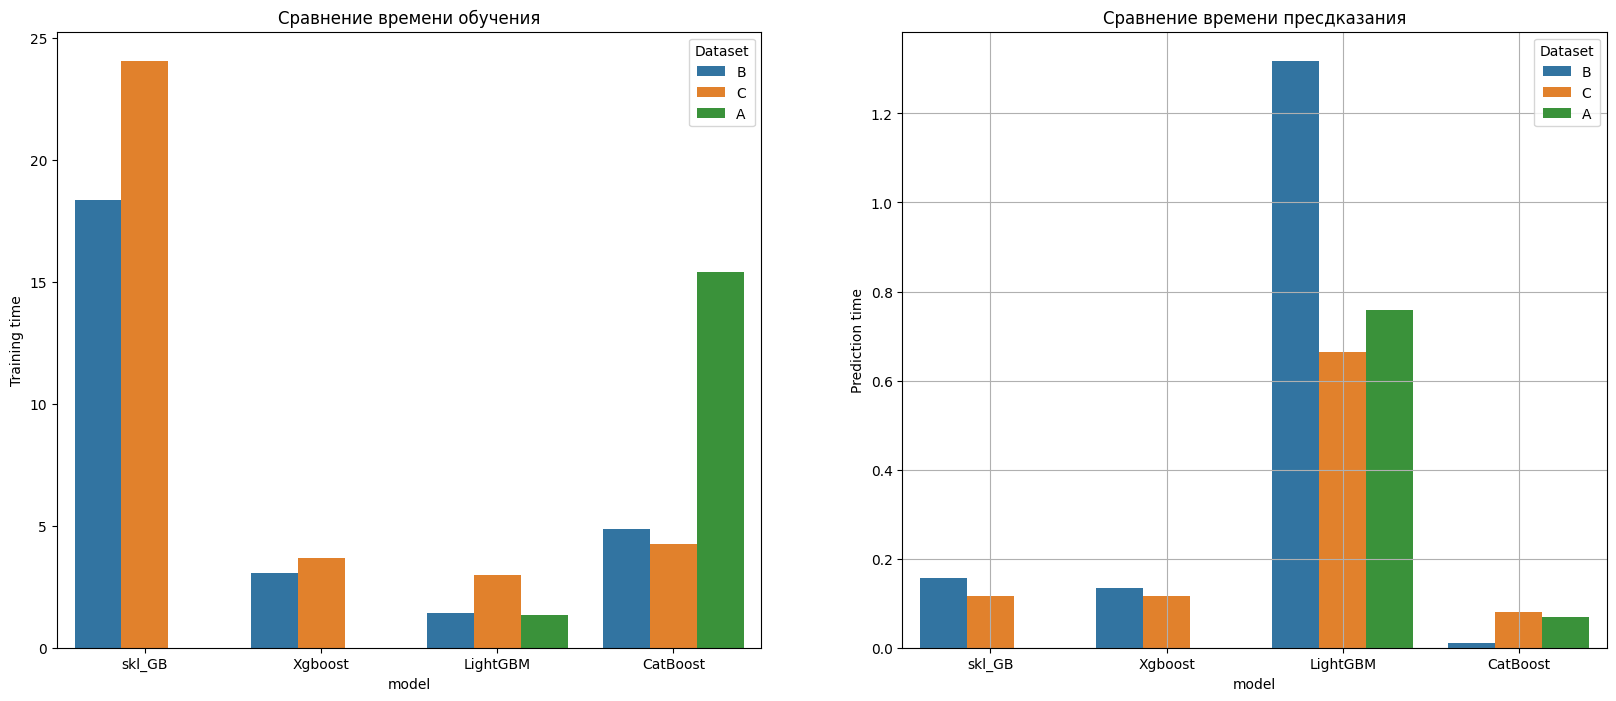

In [46]:
# Объединим датасеты с результатами в один
df_combined = pd.concat([df_skl, df_xgb, df_lightgbm, df_catboost], ignore_index=True)

# Гистограмма: время обучения
fig, axs = plt.subplots(1, 2, figsize=(20, 8))

sns.barplot(x='model', y='Training time', hue='Dataset', data=df_combined, ax=axs[0])
axs[0].set_title("Сравнение времени обучения")

sns.barplot(x='model', y='Prediction time', hue='Dataset', data=df_combined, ax=axs[1])
axs[1].set_title("Сравнение времени пресдказания")

plt.grid()
plt.show()

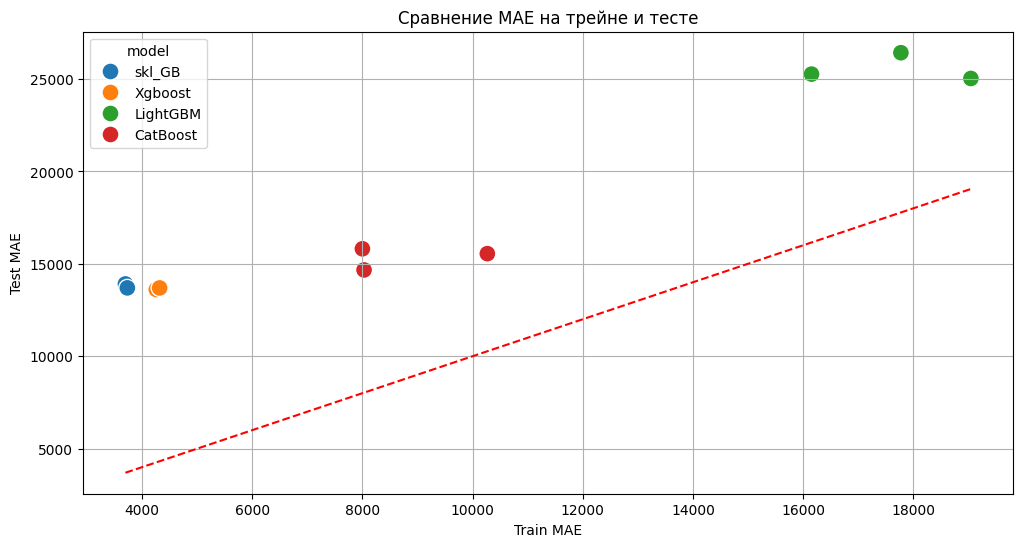

In [50]:
# Scatter plot: Сравнение MAE
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Train MAE', y='Test MAE', hue='model', s=150, data=df_combined)
plt.plot([df_combined['Train MAE'].min(), df_combined['Train MAE'].max()],
         [df_combined['Train MAE'].min(), df_combined['Train MAE'].max()], 'r--')
plt.title("Сравнение MAE на трейне и тесте")
plt.xlabel("Train MAE")
plt.ylabel("Test MAE")
plt.grid(True)
plt.show()

**<font color='MediumOrchid'>Ваши выводы:</font>**

Из визуализации можно сделать следующие выводы:
* `skl_GB` показал **более длительное обучение**, что указывает на **низкую эффективность метода** при обучении на более объемных или сложных данных. По времени предсказания он показал гораздо менее долгое время.

* `Xgboost` и `LightGBM` показали **существенно меньшее время обучения**, что говорит о их **высокой оптимизации алгоритмов**, вследствие ***улучшение производительности***. `LightGBM` показал самое **длительное время** предсказания на всех датасетах, что может говорить о сложности обученной модели или количества деревьев.

* `CatBoost` показал у***меренное время обучение***, однако на **датасете А** оно заметно **выше**, что указывает на дополнительные затраты при работе с категориальными признаками. Время предсказания существенно меньше.

\
`Xgboost` выглядит наиболее сбалансированным по времени. \
`LightGMB` выделяется быстрой обучаемостью, но ценой долгого предсказания. \
`CatBoost` может показал себя **умеренно**, **несколько больше время обучения на датасетах с категориалными переменными** и значительно на датасете А с разметкой категориальных переменных и **достаточно быстрым предсказанием**. \
`skl_GB` показал худшую производительность как по времени обучения, так и по времени предсказания, что делает его наименее подходящим в данной задаче, вследствии и для масштабных данных.

#### MAE

* `skl_GB` (**синие точки**): стабильный результат, низкий `MAE` на трейне и тесте, но из-за проблемы со временем обучения он не эффективен по производительности.
* `Xgboost` (***оранжевые точки***):  самый лучший балансированный результат из всех, его точки находтся ближе всего к красной "**идеальной**" линии, что указывает на наименьшее переобучение и высокое качество предсказаний, также по времени он самый быстрый, что делает его **симпатичным** вариантом.
* `LightGMB` (**зеленые точки**): показал высокое значение MAE как на трейне, так и на тесте. Очень походит на недообучение, либо она адаптировалась к диапазону цен. Возможно требуется донастройка параметров, либо какое то преобразование целевой переменной, так как у него процедуры происходят "**немножко нетривиально**", то по времени обучения и ошибки делаем вывод, что в данном сравнении он занимает **"почетное 1 место, эх, круто, но только с конца")**.
* `Catboost` (**красные точки**): показал низкую MAE на трейне, но высокую на тесте. Явный признак переобучения, помня про его время обучения делаем вывод, что он не ***оптимален***. \

1. `Xgboost` - ***не, ну это це лайк железно***.
2. `LightGBM` - ***сооомнительно, но, ооокей***;
3. `Catboost` - ***Мне п#х, я так чувствую, выше всех***;
4. `skl_GM` - ***ну это пи*$#! какой то** (шутка, надеюсь поднял настроение, вспомня Тинька ;), ниче против бустинга sklearn не имею, но надо же как то сравнить:))